### black_hole_properties
---
1. This script looks at how all black hole properties correlate with low and high mass galaxies of all morphologies.

---

In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import split_population
import plot_population
import imp
import kin_morph_funcs as knf

imp.reload(split_population)
imp.reload(plot_population)
from astropy.cosmology import Planck15

In [71]:
from matplotlib import rc
rc('text', usetex=True)
from matplotlib import rcParams
rcParams['axes.linewidth'] = 4
rcParams['ytick.major.size'] = 5.5
rcParams['ytick.major.width'] = 2.5
rcParams['xtick.major.size'] = 5.5
rcParams['xtick.major.width'] = 2.5

rcParams['ytick.minor.size'] = 4.5
rcParams['ytick.minor.width'] = 2
rcParams['xtick.minor.size'] = 4.5
rcParams['xtick.minor.width'] = 2

rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
outplot = '/Users/cd201/projects/bh_star_gas_misalignment/local/plots/'

In [4]:
# ---------------------------------------------------------------------------------------
# Loading in TNG100 sample with z=0 info to select samples.
tng100_main = pd.read_csv('/Users/cd201/morphology_misalignment/catalogues/tng100_mpl8_pa_info_v0.1_z0_info.csv', comment='#')
tng100_pa = split_population.tng100_pa_sample(tng100_main)

# Breaking down morphology (deviations from sfms).
QU, SF, GV = split_population.SFMS_breakdown(tng100_pa)

In [57]:
mpl7 = pd.read_csv('/Users/cd201/mpl7_kin_gz.csv')
tng100_pa = tng100_pa[np.in1d(tng100_pa.mangaid.values, mpl7.mangaid.values)]

print(tng100_pa.shape)
# Breaking down morphology (deviations from sfms).
QU, SF, GV = split_population.SFMS_breakdown(tng100_pa)

/Users/cd201/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2464, 29)


In [12]:
# ---------------------------------------------------------------------------------------
# Loading in mass history file.
mass_tab = pd.read_csv('/Users/cd201/projects/bh_star_gas_misalignment/popeye/catalogues/tng100_bh_history.csv')
mass_tab['branch_lookback_time'] = Planck15.lookback_time(mass_tab.branch_z.values).value
# ---------------------------------------------------------------------------------------

# defining new columns for mass table.
mass_tab['gas_fraction'] = mass_tab['gas_mass'] / mass_tab['stel_mass']
mass_tab['BH_CumEgyInjection_Total'] = mass_tab['BH_CumEgyInjection_QM'] + mass_tab['BH_CumEgyInjection_RM']

In [20]:
# adding gas metallicity in solar units. 
mass_tab['GasMetallicitySolar'] = mass_tab['GasMetallicity'] / 0.0134

In [9]:
# Loading in ang mom history file.
ang_tab = pd.read_csv('/Users/cd201/morphology_misalignment/catalogues/tng_mpl8_ang_mom_history.csv')

branch_z = np.zeros(ang_tab.shape[0])
# adding columns to table?
for i, sn in enumerate(ang_tab.branch_snapnum.values):
    branch_z[i] = split_population.snap_to_z(sn)
ang_tab['branch_z'] = branch_z
ang_tab['branch_lookback_time'] = Planck15.lookback_time(ang_tab.branch_z.values).value

In [8]:
# also loading a gas history tab. 
gas_tab = pd.read_csv('/Users/cd201/projects/bh_star_gas_misalignment/popeye/catalogues/tng100_gas_history.csv')
gas_tab['branch_lookback_time'] = Planck15.lookback_time(gas_tab.branch_z.values).value


In [43]:
# adding new instantaneous energy injected column. this takes a while.

mass_tab['BH_InstantEgyInjection_Total'] = np.zeros(mass_tab.shape[0])
mass_tab['BH_InstantEgyInjection_QM'] = np.zeros(mass_tab.shape[0])
mass_tab['BH_InstantEgyInjection_RM'] = np.zeros(mass_tab.shape[0])

for sub in np.unique(mass_tab.root_subfind.values):
    print(sub)
    # defining single tree.
    single_tab = mass_tab[mass_tab.root_subfind.values == sub]
    # finding instantaneous energy output at each snapshot.
    cumsum_energy_QM = - single_tab.BH_CumEgyInjection_QM.diff()[1:]
    cumsum_energy_RM = - single_tab.BH_CumEgyInjection_RM.diff()[1:]
    cumsum_energy_total = cumsum_energy_QM + cumsum_energy_RM
    
    # adding additional value at start to compensate for size difference.
    cumsum_energy_QM = np.append(cumsum_energy_QM.values, 0)
    cumsum_energy_RM = np.append(cumsum_energy_RM.values, 0)
    cumsum_energy_total = np.append(cumsum_energy_total.values, 0)

    mass_tab['BH_InstantEgyInjection_Total'][mass_tab.root_subfind.values == sub] = cumsum_energy_total
    mass_tab['BH_InstantEgyInjection_QM'][mass_tab.root_subfind.values == sub] = cumsum_energy_QM
    mass_tab['BH_InstantEgyInjection_RM'][mass_tab.root_subfind.values == sub] = cumsum_energy_RM


3


/Users/cd201/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cd201/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cd201/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4
5
12
13
15
16
17
18
19
20
21
23
26
27
29
31
33
34
36
38
39
44
45
46
47
48
49
50
52
56
57
59
60
65
67
70
71
73
74
75
76
77
78
79
81


/Users/cd201/anaconda3/lib/python3.6/site-packages/pandas/core/algorithms.py:1635: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


83
85
86
90
91
93
94
95
97
99
100
103
107
109
110
111
112
114
117
120
121
124
127
128
129
130
131
133
137
145
146
147
149
150
154
155
157
159
160
162
165
166
167
168
178
184
188
190
197
200
206
216
229
234
246
248
262
273
278
758
17189
17191
17193
17194
17195
17196
17197
17198
17199
17200
17202
17203
17204
17205
17206
17208
17212
17214
17217
17218
17219
17221
17222
17226
17227
17229
17232
17233
17234
17235
17236
17238
17239
17240
17241
17244
17245
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17263
17265
17266
17267
17268
17269
17271
17274
17275
17277
17278
17281
17284
17291
17293
17294
17296
17297
17302
17303
17304
17306
17308
17310
17311
17316
17323
17325
17330
17337
17340
17345
17347
17348
17362
17368
17399
17449
17453
17465
17495
17592
31345
31346
31347
31348
31349
31350
31351
31352
31353
31354
31355
31356
31357
31359
31360
31361
31362
31363
31364
31366
31367
31368
31371
31372
31373
31375
31377
31378
31380
31383
31384
31389
31391
31392
31393
31394
31396
31

191100
192899
192900
192901
192902
192903
192906
192907
192908
192909
192910
192912
192914
192918
192919
192920
192923
192924
192928
192933
194950
194958
194959
194961
194963
194965
194970
197110
197111
197112
197113
197115
197117
197120
197125
197135
197149
197155
199322
199323
199326
199327
199333
200804
200805
200806
200807
200808
200809
200810
200814
200818
200819
200820
200821
200829
200848
202635
202636
202637
202638
202639
202640
202642
202643
202644
202645
202646
202647
202648
202654
202659
204235
204237
204238
204240
204241
204243
204245
204252
204253
204255
204256
204258
204262
204265
204267
206228
206232
206236
207474
207475
207477
207478
207479
207480
207481
207487
207488
207489
207498
207520
208783
208784
208787
208792
208793
208797
208800
210763
210766
210767
210768
210771
210777
210779
210780
210786
210788
212837
212838
212840
212841
212844
212846
212847
212848
212853
212855
214453
214454
214456
214457
214458
214459
214460
214463
214467
214483
214530
216017
216018
216024

362373
362551
362552
362554
362559
362780
362782
363104
363105
363107
363315
363317
363318
363526
363531
363736
363737
363738
363744
364263
364479
364482
364483
364807
364815
365010
365493
365743
365745
366035
366036
366037
366038
366040
366338
366341
366345
366351
366565
366567
366792
366793
367139
367456
367457
367688
367689
367934
368170
368174
368177
368438
368697
368698
368700
368884
368898
369152
369156
369366
369367
369368
369545
369546
369789
370003
370004
370006
370008
370190
370191
370192
370195
370529
370781
370782
371013
371016
371259
371471
371477
371479
371704
371705
371707
371710
371859
372175
372176
372343
372345
372568
372778
372786
373050
373053
373291
373292
373295
373510
373511
373699
373700
373702
373951
373952
373954
374228
374229
374379
374385
374388
374593
374789
375236
375237
375401
375403
375404
375410
375639
375641
375909
375911
376132
376135
376356
376357
376544
376545
376554
376738
376740
376741
376963
377212
377214
377539
377543
377804
378116
378298
378300

476527
476528
476557
476624
476820
476892
477032
477119
477227
477419
477422
477518
477624
477875
477919
478092
478093
478160
478247
478358
478410
478452
478496
478497
478535
478604
478661
478927
479002
479314
479373
479411
479560
479561
479628
479799
479839
479884
479885
479917
480000
480075
480194
480285
480345
480391
480498
480550
480645
480712
480750
480879
480931
481036
481126
481254
481347
481405
481597
481894
481947
482006
482054
482118
482169
482196
482257
482481
482533
482714
482814
482815
482869
482987
483068
483113
483179
483216
483269
483421
483484
483693
483749
483812
483868
483900
483901
483977
483978
484045
484113
484155
484257
484307
484427
484608
484609
484715
484905
484944
485095
485233
485283
485284
485326
485365
485485
485597
485703
485747
485887
485951
486009
486052
486124
486186
486281
486341
486384
486463
486782
486875
486923
487042
487072
487099
487100
487152
487244
487276
487363
487364
487438
487496
487698
487877
487913
487965
487993
488228
488356
488446
488537

583480
583580
583740
583824
583919
584104
584313
584357
584378
584710
584885
585026
585123
585290
585302
585335
585369
585445
585553
585575
585609
585689
585860
585970
586131
586279
586487
586541
586561
586587
586749
587096
587122
587293
587357
587771
587792
587917
588209
588239
588251
588295
588397
588403
588523
588554
588670
588676
588772
589031
589046
589115
589351
589507
589541
589573
589611
589669
589677
589743
589988
590104
590158
590401
590511
590583
590890
590992
591106
591265
591278
591288
591344
591425
591604
591612
591668
591774
591922
591953
592022
592046
592283
592302
592324
592368
592594
592690
592691
592734
592847
592962
593039
593051
593121
593264
593271
593302
593397
593430
593493
593499
593509
593523
593572
593573
593595
593747
593832
594444
594459
594499
594532
594757
594800
594892
594991
595031
595058
595171
595201
595238
595336
595380
595460
595498
595586
595799
595832
595977
595993
596057
596113
596132
596326
596385
596430
596678
596929
597066
597117
597121
597135

In [44]:
# dropping all mass table columns with nan.

mass_tab = mass_tab.dropna(subset=['BH_InstantEgyInjection_Total'])
mass_tab = mass_tab[(mass_tab.BH_InstantEgyInjection_Total < np.inf) & (mass_tab.BH_InstantEgyInjection_Total > -np.inf)]

### adding column of cold gas mass normalised by stellar mass.
mass_tab['cold_gas_stellar_fraction'] = mass_tab.cold_gas_fraction.values * mass_tab.gas_fraction.values

/Users/cd201/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [45]:
gas_tab['frac_of_which_cold'] = gas_tab['cold_gas_frac_2re'] / gas_tab['gas_frac_2re']
gas_tab['cold_gas_mass_2re'] = gas_tab['frac_of_which_cold'] * gas_tab['gas_mass_2re']

In [32]:
gas_tab.columns

Index(['branch_subfind', 'branch_snapnum', 'root_subfind', 'root_snap',
       'stel_mass_2re', 'gas_mass_2re', 'gas_frac_2re', 'cold_gas_frac_2re',
       'GasMetallicity_2re', 'branch_z', 'branch_lookback_time',
       'frac_of_which_cold'],
      dtype='object')

/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:241: RuntimeWarning: invalid value encountered in greater
  plot_property_evolution(QU_align_tab_HM.branch_lookback_time.values[QU_align_tab_HM[property].values > condition], QU_align_tab_HM[property].values[QU_align_tab_HM[property].values > condition], ax[1], r'$M_{stel} \geq 10^{10.2}M_{\odot}$, $\Delta$PA $< 30^{\circ}$', color='salmon', linestyle='solid')
/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:242: RuntimeWarning: invalid value encountered in greater
  plot_property_evolution(QU_mis_tab_HM.branch_lookback_time.values[QU_mis_tab_HM[property].values > condition], QU_mis_tab_HM[property].values[QU_mis_tab_HM[property].values > condition], ax[1], r'$M_{stel} \geq 10^{10.2}M_{\odot}$, $\Delta$PA $\geq 30^{\circ}$',color='salmon', linestyle='dashed')
/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:243: RuntimeWarning: invalid value encountered in g

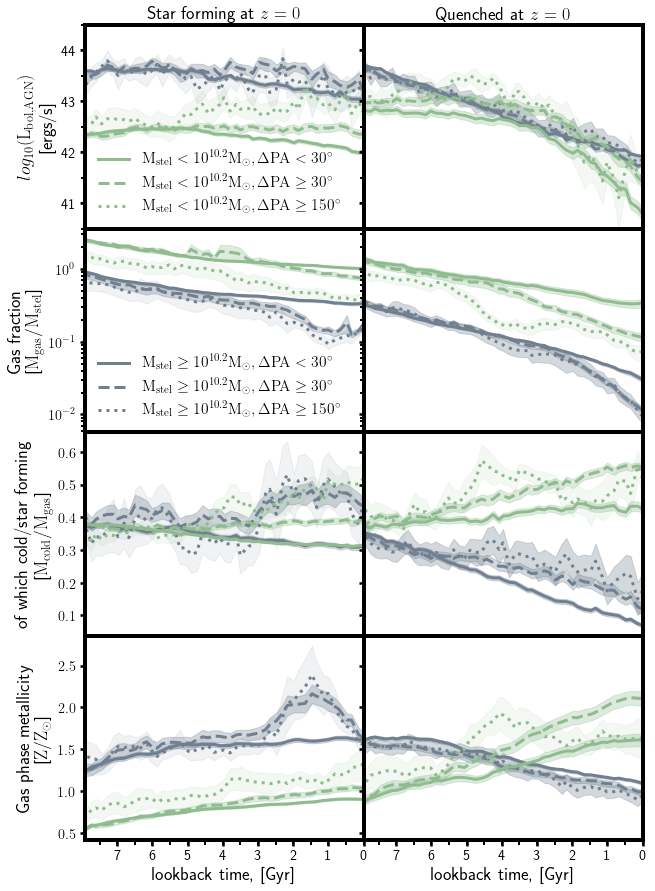

In [131]:
lower_mass = 10**10.2
upper_mass = 10**10.2

plt.cla()
plt.close()
fig, ax = plt.subplots(4, 2, figsize=(10, 15), sharey='row', sharex='all')
plot_population.plot_two_evolution_mass(QU, SF, mass_tab, 'log10_Lbh_bol', 0, ax[0, :], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, gas_tab, 'gas_frac_2re', 0, ax[1,:], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, gas_tab, 'frac_of_which_cold', 0, ax[2,:], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, mass_tab, 'GasMetallicitySolar', 0, ax[3,:], lower_mass, upper_mass)
#plot_population.plot_two_evolution_mass(QU, SF, gas_tab, 'frac_of_which_cold', 0, ax[4,:], lower_mass, upper_mass)
#plot_population.plot_row_evolution_mass(QU, GV, SF, mass_tab, 'BH_InstantEgyInjection_Total', 0, ax[2,:], lower_mass, upper_mass)
# central star formation?

fs = 18
ax[0,0].set_ylabel('$log_{10}\mathrm{(L_{bol, AGN})}$ \n [ergs/s]', fontsize=fs)
ax[1,0].set_ylabel('Gas fraction \n [$\mathrm{M_{gas}/M_{stel}}$]', fontsize=fs)
ax[2,0].set_ylabel('of which cold/star forming \n [$\mathrm{M_{cold}/M_{gas}}$]', fontsize=fs)
ax[3,0].set_ylabel('Gas phase metallicity \n [$\mathrm{Z/Z_{\odot}}$]', fontsize=fs)

#ax[2,0].set_ylabel('Cold gas fraction \n [$M_{gas}(T < 10^{5}K)$/$M_{stel}$]', fontsize=fs)

ax[0,0].set_title('Star forming at $z=0$', fontsize=fs)
ax[0,1].set_title('Quenched at $z=0$', fontsize=fs)

ax[-1,0].set_xlabel('lookback time, [Gyr]', fontsize=fs)
ax[-1,1].set_xlabel('lookback time, [Gyr]', fontsize=fs)

ax[0,0].legend(frameon=False, fontsize=15.5)
lines = ax[0,1].get_legend_handles_labels()[0]
labels = ax[0,1].get_legend_handles_labels()[1]
ax[1,0].legend(lines, labels, frameon=False, fontsize=15.5)

ax[0,0].set_ylim([40.5, 44.5])
plot_population.xtick_format(1, 0.5, ax[0,0], format='%1.0f')
plot_population.ytick_format(1, 0.5, ax[0,0], format='%1.0f')

ax[1,0].set_yscale('log')

#plot_population.ytick_format(0.01, 0.005, ax[3,0], format='%1.2f')

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()
#plt.savefig(outplot+'two_pop_evolution_Mstel10_2_cold_gas.pdf', format='pdf', bbox_inches='tight')

### Plotting energy injection and BH mass growth

In [200]:
fig, ax = plt.subplots(2,2, figsize=(10, 7), sharex='all', sharey='row')
plot_population.plot_two_residual_LM(QU, SF, mass_tab, 'BH_InstantEgyInjection_Total', 0, ax[0,:], 10**10.2, 10**10.2, peak=True)
plot_population.plot_two_residual_LM(QU, SF, mass_tab, 'BH_mass', 0, ax[1,:], 10**10.2, 10**10.2)

ax[1,0].legend(frameon=False, fontsize=16, loc='upper left')
ax[0,0].set_ylim([-10**15/3, 0.8*10**15])
ax[0,1].set_ylim([-10**15/3, 0.8*10**15])
#ax[0,2].set_ylim([-10**15/3, 0.8*10**15])

ax[1,0].set_ylim([-10**7 /1.5, 1.5*10**7])
ax[1,1].set_ylim([-10**7 /1.5, 1.5*10**7])
#ax[1,2].set_ylim([-10**7 /1.5, 1.5*10**7])
ax[0,0].set_ylabel('$\Delta$Energy injected \n [$M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}$]', fontsize=13)
#ax[0,1].set_ylabel('$\Delta$Energy injected, \n [$M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}$]', fontsize=13)
#ax[0,2].set_ylabel('$\Delta$Energy injected, \n [$M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}$]', fontsize=13)

ax[1,0].set_ylabel('$\Delta$$M_{BH}$ \n [$M_{\odot}$]', fontsize=15)
#ax[1,1].set_ylabel('$\Delta$$M_{BH}$, [$M_{\odot}$]', fontsize=15)
#ax[1,2].set_ylabel('$\Delta$$M_{BH}$, [$M_{\odot}$]', fontsize=15)

ax[0,1].set_title('Quenched at $z=0$', fontsize=17)
# ax[0,1].set_title('Green valley at $z=0$', fontsize=16)
ax[0,0].set_title('Star forming at $z=0$', fontsize=17)

ax[0,0].set_xlabel('lookback time, [Gyr]', fontsize=16)
ax[0,1].set_xlabel('lookback time, [Gyr]', fontsize=16)
#ax[0,2].set_xlabel('lookback time, [Gyr]', fontsize=16)
ax[0,0].xaxis.set_tick_params(labelbottom=True)
ax[0,1].xaxis.set_tick_params(labelbottom=True)
#ax[0,2].xaxis.set_tick_params(labelbottom=True)

ax[-1,0].set_xlabel('lookback time, [Gyr]', fontsize=16)
ax[-1,1].set_xlabel('lookback time, [Gyr]', fontsize=16)
#ax[-1,2].set_xlabel('lookback time, [Gyr]', fontsize=16)

plot_population.xtick_format(1, 0.5, ax[0,0], format='%1.0f')
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,0].yaxis.get_offset_text().set_visible(False)
ax[1,0].annotate(r'$\times 10^{7}$', xy=(0.125, 0.485), xycoords='figure fraction', fontsize=15)

ax[0,0].yaxis.get_offset_text().set_visible(False)
ax[0,0].annotate(r'$\times 10^{14}$', xy=(0.125, 0.905), xycoords='figure fraction', fontsize=15)

fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outplot+'LM_BH_residual_evo_Mstel10_2_twocol.pdf', format='pdf', bbox_inches='tight')

In [152]:
fig, ax = plt.subplots(2,2, figsize=(10, 7.5), sharex='all', sharey='row')
plot_population.plot_two_residual_HM(QU, SF, mass_tab, 'BH_InstantEgyInjection_Total', 0, ax[0,:], 10**10.2, 10**10.2, peak=True)
plot_population.plot_two_residual_HM(QU, SF, mass_tab, 'BH_mass', 0, ax[1,:], 10**10.2, 10**10.2)

ax[0,0].legend(frameon=False, fontsize=12, loc='lower left')
ax[0,0].set_ylim([-10**16/3, 0.5*10**16])
ax[0,1].set_ylim([-10**16/3, 0.5*10**16])
#ax[0,2].set_ylim([-10**15/3, 0.8*10**15])

ax[1,0].set_ylim([-10**7, 8*10**7])
ax[1,1].set_ylim([-10**7, 8*10**7])
#ax[1,2].set_ylim([-10**7 /1.5, 1.5*10**7])
ax[0,0].set_ylabel('$\Delta$Energy injected, \n [$M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}$]', fontsize=13)
#ax[0,1].set_ylabel('$\Delta$Energy injected, \n [$M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}$]', fontsize=13)
#ax[0,2].set_ylabel('$\Delta$Energy injected, \n [$M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}$]', fontsize=13)

ax[1,0].set_ylabel('$\Delta$$M_{BH}$, [$M_{\odot}$]', fontsize=15)
#ax[1,1].set_ylabel('$\Delta$$M_{BH}$, [$M_{\odot}$]', fontsize=15)
#ax[1,2].set_ylabel('$\Delta$$M_{BH}$, [$M_{\odot}$]', fontsize=15)

ax[0,1].set_title('Quenched at $z=0$', fontsize=16)
# ax[0,1].set_title('Green valley at $z=0$', fontsize=16)
ax[0,0].set_title('Star forming at $z=0$', fontsize=16)

ax[0,0].set_xlabel('lookback time, [Gyr]', fontsize=16)
ax[0,1].set_xlabel('lookback time, [Gyr]', fontsize=16)
#ax[0,2].set_xlabel('lookback time, [Gyr]', fontsize=16)
ax[0,0].xaxis.set_tick_params(labelbottom=True)
ax[0,1].xaxis.set_tick_params(labelbottom=True)
#ax[0,2].xaxis.set_tick_params(labelbottom=True)

ax[-1,0].set_xlabel('lookback time, [Gyr]', fontsize=16)
ax[-1,1].set_xlabel('lookback time, [Gyr]', fontsize=16)
#ax[-1,2].set_xlabel('lookback time, [Gyr]', fontsize=16)

plot_population.xtick_format(1, 0.5, ax[0,0], format='%1.0f')
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

fig.subplots_adjust(wspace=0, hspace=0.275)
plt.savefig(outplot+'HM_BH_residual_evo_Mstel10_2_twocol.pdf', format='pdf', bbox_inches='tight')


#### Plotting stel_gas_3d evolution for all kinetic vs thermal mode feedback galaxies

In [66]:
ang_tab.columns

Index(['Unnamed: 0', 'branch_snapnum', 'branch_subfind', 'gas_DM_2d',
       'gas_DM_3d', 'mag_sJ_DM', 'mag_sJ_gas', 'mag_sJ_stel', 'root_snapnum',
       'root_subfind', 'stel_DM_2d', 'stel_DM_3d', 'stel_gas_2d',
       'stel_gas_3d', 'branch_z', 'branch_lookback_time'],
      dtype='object')

In [81]:
lower_mass = 10**10.2
upper_mass = 10**10.2

plt.cla()
plt.close()
fig, ax = plt.subplots(1, 3, figsize=(13, 3), sharey='row', sharex='all')
plot_population.plot_row_evolution_mass(QU, GV, SF, ang_tab, 'stel_gas_3d', 0, ax, lower_mass, upper_mass)

ax[0].set_ylim([0,180])
ax[0].set_ylabel('$\Delta$PA [$^{\circ}$]')
ax[0].set_title('Quenched at $z=0$', fontsize=14)
ax[1].set_title('Green valley at $z=0$', fontsize=14)
ax[2].set_title('Star forming at $z=0$', fontsize=14)
ax[0].set_xlabel('lookback time, [Gyr]', fontsize=14)
ax[1].set_xlabel('lookback time, [Gyr]', fontsize=14)
ax[2].set_xlabel('lookback time, [Gyr]', fontsize=14)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outplot+'PA_evolution.pdf', format='pdf', bbox_inches='tight')

/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:171: RuntimeWarning: invalid value encountered in greater
  _, _, GV_counter_tab_HM, _, _, GV_counter_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(GV, mass_tab, lower_PA=30, upper_PA=150, lower_percentile=lower_percentile, upper_percentile=upper_percentile)
/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:172: RuntimeWarning: invalid value encountered in greater
  
/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:173: RuntimeWarning: invalid value encountered in greater
  SF_tab_HM, SF_align_tab_HM, SF_mis_tab_HM, SF_tab_LM, SF_align_tab_LM, SF_mis_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(SF, mass_tab, lower_PA=30, upper_PA=30, lower_percentile=lower_percentile, upper_percentile=upper_percentile)
/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:175: RuntimeWarning: invalid value encounter

### Computing energy mode injected fractions for samples defined

In [126]:
lower_mass = 10**10.2
upper_mass = 10**10.2

tab_HM, align_tab_HM, mis_tab_HM, tab_LM, align_tab_LM, mis_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(tng100_pa, mass_tab[mass_tab.branch_lookback_time.values < 3], lower_PA=30, upper_PA=30, lower_mass=lower_mass, upper_mass=upper_mass)
_, _, counter_tab_HM, _, _, counter_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(tng100_pa, mass_tab[mass_tab.branch_lookback_time.values < 3], lower_PA=30, upper_PA=150, lower_mass=lower_mass, upper_mass=upper_mass)


In [14]:
print('For the misaligned low mass galaxies '+str(np.sum(mis_tab_LM['BH_InstantEgyInjection_QM']) / np.sum(mis_tab_LM['BH_InstantEgyInjection_Total']) * 100)
      +'% of energy injected is through Quasar mode')

print('For the misaligned high mass galaxies '+str(np.sum(mis_tab_HM['BH_InstantEgyInjection_QM']) / np.sum(mis_tab_HM['BH_InstantEgyInjection_Total']) * 100)
      +'% of energy injected is through Quasar mode \n')

print('For the counter-rotating low mass galaxies '+str(np.sum(counter_tab_LM['BH_InstantEgyInjection_QM']) / np.sum(counter_tab_LM['BH_InstantEgyInjection_Total']) * 100)
      +'% of energy injected is through Quasar mode')

print('For the counter-rotating high mass galaxies '+str(np.sum(counter_tab_HM['BH_InstantEgyInjection_QM']) / np.sum(counter_tab_HM['BH_InstantEgyInjection_Total']) * 100)
      +'% of energy injected is through Quasar mode \n')

print('For the aligned low mass galaxies '+str(np.sum(align_tab_LM['BH_InstantEgyInjection_QM']) / np.sum(align_tab_LM['BH_InstantEgyInjection_Total']) * 100)
      +'% of energy injected is through Quasar mode')

print('For the aligned high mass galaxies '+str(np.sum(align_tab_HM['BH_InstantEgyInjection_QM']) / np.sum(align_tab_HM['BH_InstantEgyInjection_Total']) * 100)
      +'% of energy injected is through Quasar mode')

For the misaligned low mass galaxies 99.93925469055725% of energy injected is through Quasar mode
For the misaligned high mass galaxies 83.12765421826386% of energy injected is through Quasar mode 

For the counter-rotating low mass galaxies 99.67663091028253% of energy injected is through Quasar mode
For the counter-rotating high mass galaxies 76.03894105553015% of energy injected is through Quasar mode 

For the aligned low mass galaxies 99.86054243301189% of energy injected is through Quasar mode
For the aligned high mass galaxies 76.90683732151112% of energy injected is through Quasar mode


### Making combined plot of both feedback and luminosity etc.

In [132]:
lower_mass = 10**10.2
upper_mass = 10**10.2

plt.cla()
plt.close()
fig, ax = plt.subplots(6, 2, figsize=(10, 21), sharey='row', sharex='all')
plot_population.plot_two_evolution_mass(QU, SF, mass_tab, 'log10_Lbh_bol', 0, ax[0, :], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, gas_tab, 'gas_frac_2re', 0, ax[1,:], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, gas_tab, 'frac_of_which_cold', 0, ax[2,:], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, mass_tab, 'GasMetallicitySolar', 0, ax[3,:], lower_mass, upper_mass)
#plot_population.plot_two_evolution_mass(QU, SF, gas_tab, 'frac_of_which_cold', 0, ax[4,:], lower_mass, upper_mass)
#plot_population.plot_row_evolution_mass(QU, GV, SF, mass_tab, 'BH_InstantEgyInjection_Total', 0, ax[2,:], lower_mass, upper_mass)
# central star formation?

fs = 18
ax[0,0].set_ylabel('$log_{10}\mathrm{(L_{bol, AGN})}$ \n [ergs/s]', fontsize=fs)
ax[1,0].set_ylabel('Normalised gas mass \n ($\leq$ 2R$_e$) [$\mathrm{M_{gas}/M_{stel}}$]', fontsize=fs)
ax[2,0].set_ylabel('Cold gas fraction \n ($\leq$ 2R$_e$) [$\mathrm{M_{cold}/M_{gas}}$]', fontsize=fs)
ax[3,0].set_ylabel('Gas phase metallicity \n ($\leq$ 2R$_e$) [$\mathrm{Z/Z_{\odot}}$]', fontsize=fs)

#ax[2,0].set_ylabel('Cold gas fraction \n [$M_{gas}(T < 10^{5}K)$/$M_{stel}$]', fontsize=fs)

ax[0,0].set_title('Star forming at $z=0$', fontsize=fs+4)
ax[0,1].set_title('Quenched at $z=0$', fontsize=fs+4)

ax[-1,0].set_xlabel('lookback time, [Gyr]', fontsize=fs)
ax[-1,1].set_xlabel('lookback time, [Gyr]', fontsize=fs)

ax[0,0].legend(frameon=False, fontsize=15)
lines = ax[0,1].get_legend_handles_labels()[0]
labels = ax[0,1].get_legend_handles_labels()[1]
ax[1,0].legend(lines, labels, frameon=False, fontsize=15)

ax[0,0].set_ylim([40.5, 44.5])
plot_population.xtick_format(1, 0.5, ax[0,0], format='%1.0f')
plot_population.ytick_format(1, 0.5, ax[0,0], format='%1.0f')

ax[1,0].set_yscale('log')

#plot_population.ytick_format(0.01, 0.005, ax[3,0], format='%1.2f')

plot_population.plot_two_residual_LM(QU, SF, mass_tab, 'BH_InstantEgyInjection_Total', 0, ax[4,:], 10**10.2, 10**10.2, peak=True)
plot_population.plot_two_residual_LM(QU, SF, mass_tab, 'BH_mass', 0, ax[5,:], 10**10.2, 10**10.2)

ax[4,0].set_ylim([-10**15/3, 0.8*10**15])
ax[4,1].set_ylim([-10**15/3, 0.8*10**15])

ax[5,0].set_ylim([-10**7 /1.5, 1.5*10**7])
ax[5,1].set_ylim([-10**7 /1.5, 1.5*10**7])

ax[4,0].set_ylabel('$\Delta$Energy injected \n [$\mathrm{M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}}$]', fontsize=18)
ax[5,0].set_ylabel('$\mathrm{\Delta M_{BH}}$ [$\mathrm{M_{\odot}}$]', fontsize=18)
ax[5,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[4,0].yaxis.get_offset_text().set_visible(False)
ax[4,0].annotate(r'$\times 10^{7}$', xy=(0.03, 0.905), xycoords='axes fraction', fontsize=18)

ax[5,0].yaxis.get_offset_text().set_visible(False)
ax[5,0].annotate(r'$\times 10^{14}$', xy=(0.03, 0.905), xycoords='axes fraction', fontsize=18)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outplot+'time_evo_letter.pdf', format='pdf', bbox_inches='tight')

/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:241: RuntimeWarning: invalid value encountered in greater
  plot_property_evolution(QU_align_tab_HM.branch_lookback_time.values[QU_align_tab_HM[property].values > condition], QU_align_tab_HM[property].values[QU_align_tab_HM[property].values > condition], ax[1], r'$M_{stel} \geq 10^{10.2}M_{\odot}$, $\Delta$PA $< 30^{\circ}$', color='salmon', linestyle='solid')
/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:242: RuntimeWarning: invalid value encountered in greater
  plot_property_evolution(QU_mis_tab_HM.branch_lookback_time.values[QU_mis_tab_HM[property].values > condition], QU_mis_tab_HM[property].values[QU_mis_tab_HM[property].values > condition], ax[1], r'$M_{stel} \geq 10^{10.2}M_{\odot}$, $\Delta$PA $\geq 30^{\circ}$',color='salmon', linestyle='dashed')
/Users/cd201/projects/bh_star_gas_misalignment/local/lib/plot_population.py:243: RuntimeWarning: invalid value encountered in g

### supplementary plot of other gas properties and black hole growth for high mass population.

In [94]:
mass_tab.columns

Index(['branch_subfind', 'branch_snapnum', 'root_subfind', 'root_snap',
       'halo_mass', 'subhalo_mass', 'central_flag', 'stel_mass', 'gas_mass',
       'cold_gas_fraction', 'BH_mass', 'BH_Mdot', 'SFR', 'log10_Lbh_bol',
       'log10_Lbh_xray', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM',
       'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_local_gas_density',
       'BHpart_count', 'BH_progenitors', 'GasMetallicity', 'branch_z',
       'branch_lookback_time', 'gas_fraction', 'BH_CumEgyInjection_Total',
       'BH_InstantEgyInjection_Total', 'BH_InstantEgyInjection_QM',
       'BH_InstantEgyInjection_RM', 'cold_gas_stellar_fraction',
       'GasMetallicitySolar'],
      dtype='object')

In [128]:
lower_mass = 10**10.2
upper_mass = 10**10.2

plt.cla()
plt.close()
fig, ax = plt.subplots(5, 2, figsize=(10, 18), sharey='row', sharex='all')
plot_population.plot_two_evolution_mass(QU, SF, mass_tab, 'gas_fraction', 0, ax[0, :], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, gas_tab, 'cold_gas_frac_2re', 0, ax[1,:], lower_mass, upper_mass)
plot_population.plot_two_evolution_mass(QU, SF, ang_tab, 'mag_sJ_stel', 0, ax[2,:], lower_mass, upper_mass)

fs = 18
ax[0,0].set_ylabel('Normalized gas mass \n (all subhalo) [$\mathrm{M_{gas}/M_{stel}}$]', fontsize=fs)
ax[1,0].set_ylabel('Normalized cold gas mass \n ($\leq$ 2R$_e$) [$\mathrm{M_{cold}/M_{stel}}$]', fontsize=fs)
ax[2,0].set_ylabel('$\mathrm{j_{star}}$ \n ($\leq$ 2R$_e$) [$km s^{-1} \cdot kpc$]', fontsize=fs)

#ax[2,0].set_ylabel('Cold gas fraction \n [$M_{gas}(T < 10^{5}K)$/$M_{stel}$]', fontsize=fs)

ax[0,0].set_title('Star forming at $z=0$', fontsize=fs)
ax[0,1].set_title('Quenched at $z=0$', fontsize=fs)

ax[-1,0].set_xlabel('lookback time, [Gyr]', fontsize=fs)
ax[-1,1].set_xlabel('lookback time, [Gyr]', fontsize=fs)

ax[0,0].legend(frameon=False, fontsize=15)
lines = ax[0,1].get_legend_handles_labels()[0]
labels = ax[0,1].get_legend_handles_labels()[1]
ax[1,0].legend(lines, labels, frameon=False, fontsize=15)

ax[0,0].set_yscale('log')
ax[1,0].set_yscale('log')
ax[2,0].set_yscale('log')

#plot_population.ytick_format(0.01, 0.005, ax[3,0], format='%1.2f')

plot_population.plot_two_residual_HM(QU, SF, mass_tab, 'BH_InstantEgyInjection_Total', 0, ax[3,:], 10**10.2, 10**10.2, peak=True)
plot_population.plot_two_residual_HM(QU, SF, mass_tab, 'BH_mass', 0, ax[4,:], 10**10.2, 10**10.2)

ax[3,0].set_ylim([-10**16/3, 0.5*10**16])
ax[3,1].set_ylim([-10**16/3, 0.5*10**16])

ax[4,0].set_ylim([-10**7, 8*10**7])
ax[4,1].set_ylim([-10**7, 8*10**7])

ax[3,0].set_ylabel('$\Delta$Energy injected \n [$\mathrm{M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}}$]', fontsize=18)
ax[4,0].set_ylabel('$\mathrm{\Delta M_{BH}}$ [$\mathrm{M_{\odot}}$]', fontsize=18)
ax[4,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[3,0].yaxis.get_offset_text().set_visible(False)
ax[3,0].annotate(r'$\times 10^{7}$', xy=(0.03, 0.905), xycoords='axes fraction', fontsize=fs)

ax[4,0].yaxis.get_offset_text().set_visible(False)
ax[4,0].annotate(r'$\times 10^{15}$', xy=(0.03, 0.905), xycoords='axes fraction', fontsize=fs)
plot_population.xtick_format(1, 0.5, ax[0,0], format='%1.0f')
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outplot+'time_evo_supplement.pdf', format='pdf', bbox_inches='tight')